In [1]:
#import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
#Read input dataset
col_names = ['sepal length','sepal width','petal length','petal width', 'class']
df = pd.read_csv("iris.csv", header=None ,delim_whitespace=False)
df.columns = col_names
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Describe dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
#get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#

<AxesSubplot:>

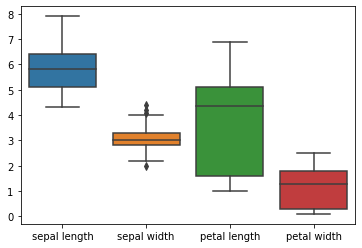

In [25]:
# Check for outliers
sns.boxplot(data=df)

C:\Users\repair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal width'>

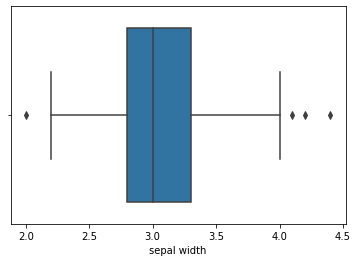

In [26]:
sns.boxplot(df['sepal width'])

In [27]:
Q1 = np.percentile(df['sepal width'], 25,interpolation = 'midpoint') 
  
Q3 = np.percentile(df['sepal width'], 75,interpolation = 'midpoint') 
IQR = Q3 - Q1 
print('IQR=%.3f', IQR)

IQR=%.3f 0.5


In [28]:
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['sepal width'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['sepal width'] <= (Q1-1.5*IQR))
  

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (150, 5)
New Shape:  (146, 5)


<AxesSubplot:>

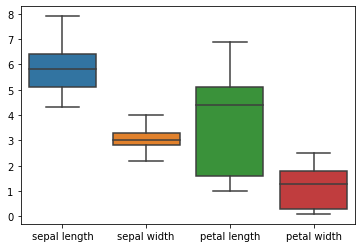

In [31]:
sns.boxplot(data=df)

In [32]:
#check for missing data
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [40]:
#drop duplicate data instances if any
df = df.drop_duplicates()
print(df.shape)
print(df)

(143, 5)
     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[143 rows x 5 columns]


In [41]:
#find number of unique classes
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
#Check if dataset is balanced
df.groupby("class").size()

class
Iris-setosa        45
Iris-versicolor    49
Iris-virginica     49
dtype: int64

# Visualization visual inspection of dataset


<AxesSubplot:>

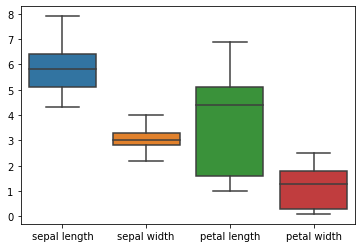

In [51]:
#Box Plot for each input variable
sns.boxplot(data = df)

array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>]], dtype=object)

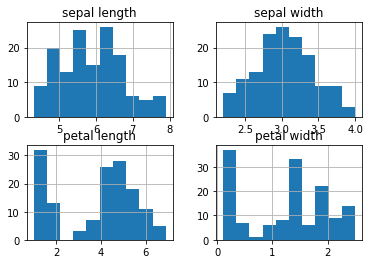

In [52]:
#Histogram Plot for each input variable
df.hist()

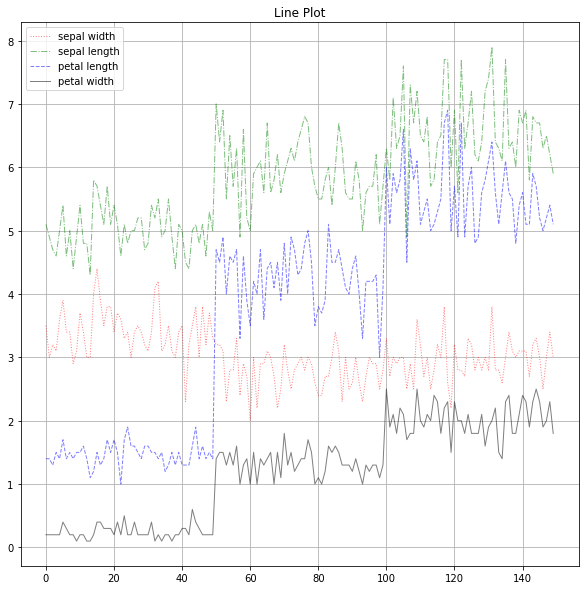

In [10]:
df['sepal width'].plot(kind = 'line', color = 'red', linewidth=1,alpha = 0.5,grid = True,linestyle = ':', figsize = (10,10))
df['sepal length'].plot(kind = 'line', color = 'green', linewidth=1,alpha = 0.5,grid = True,linestyle = '-.', figsize = (10,10))
df['petal length'].plot(kind = 'line', color = 'blue', linewidth=1,alpha = 0.5,grid = True,linestyle = '--', figsize = (10,10))
df['petal width'].plot(kind = 'line', color = 'black', linewidth=1,alpha = 0.5,grid = True,linestyle = '-', figsize = (10,10))
plt.legend()
plt.title('Line Plot')
plt.show()

In [13]:
df_class = df.groupby('class', axis=0).sum()
print(type(df.groupby('class', axis=0)))

df_class.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,250.3,170.9,73.2,12.2
Iris-versicolor,296.8,138.5,213.0,66.3
Iris-virginica,329.4,148.7,277.6,101.3


In [14]:
df_class['class'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.show()

KeyError: 'class'

array([[<AxesSubplot:xlabel='sepal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal length'>,
        <AxesSubplot:xlabel='class', ylabel='sepal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal width'>,
        <AxesSubplot:xlabel='class', ylabel='sepal width'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='petal length'>,
        <AxesSubplot:xlabel='class', ylabel='petal length'>],
       [<

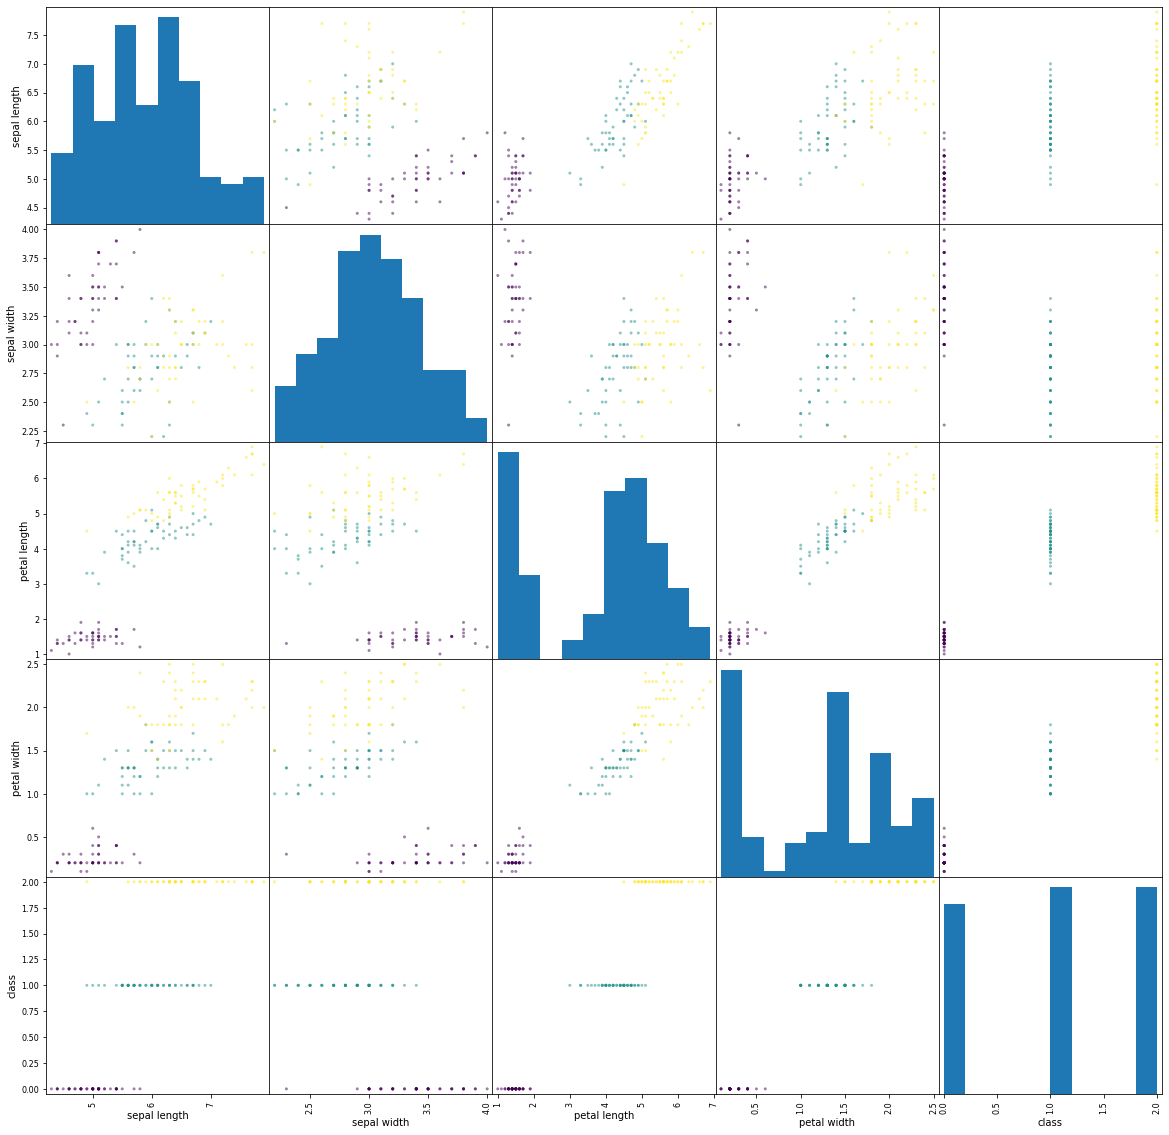

In [56]:
#scatter Plot for two input variables
#df['class'].astype('category').cat.codes
import sklearn
df['class'] = sklearn.preprocessing.LabelEncoder().fit_transform(list(df['class']))
pd.plotting.scatter_matrix(df,figsize=(20,20),c=df['class'])

In [58]:
#Statistical Summary after cleaning
df.describe()

,sepal length,sepal width,petal length,petal width,class
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.870629,3.038462,3.830769,1.230769,1.027972
std,0.835045,0.398222,1.750824,0.754538,0.813132
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [62]:
# Split the data into training and testing
X = df.drop('class',axis=1)
y = df['class'] 

In [99]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 0 )
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.93


In [101]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.93


In [105]:
#K nearest nighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.93


In [106]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.93


In [107]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.93
